🤖 Iniciando Bot de Trading Binario...
YF.download() has changed argument auto_adjust default to True

📊 RESULTADO DEL EXAMEN:
Precisión del Bot: 54.00%
(Significa: ¿Qué porcentaje de las veces adivinó correctamente la dirección?)


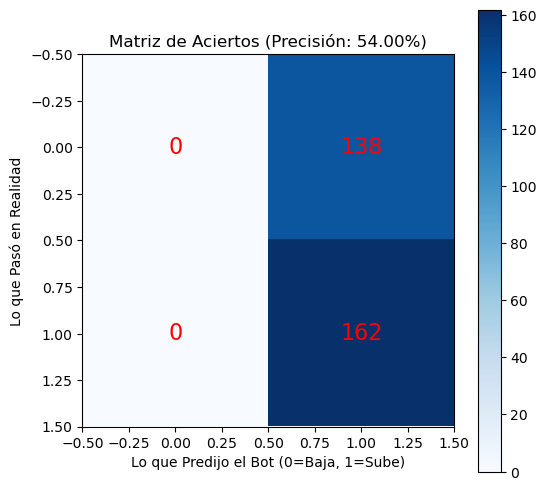


🔮 PREDICCIÓN PARA MAÑANA: El modelo cree que Apple va a SUBIR 🟢


/Users/axelalexis/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

print("🤖 Iniciando Bot de Trading Binario...")

# 1. OBTENER DATOS
df = yf.download('AAPL', start='2020-01-01', progress=False)

# Limpieza de índices múltiples (si aplica)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)
    
df = df[['Close']].copy()

# 2. INGENIERÍA DE DATOS (Crear las "Pistas")
# En lugar del día, usaremos el "Retorno Diario" (¿Cuánto ganó/perdió ayer?)
df['Retorno'] = df['Close'].pct_change()

# Creamos retardos (Lags): ¿Qué pasó hace 1 día? ¿Qué pasó hace 2 días?
# La hipótesis: Si bajó 2 días seguidos, quizás rebote (o no). La IA decidirá.
df['Lag_1'] = df['Retorno'].shift(1)
df['Lag_2'] = df['Retorno'].shift(2)

# 3. DEFINIR EL OBJETIVO (Target)
# Si mañana el precio sube, ponemos 1. Si baja, ponemos 0.
# shift(-1) mira hacia el futuro (mañana)
df['Target'] = np.where(df['Retorno'].shift(-1) > 0, 1, 0)

# Borramos los huecos vacíos (NaN)
df = df.dropna()

# 4. PREPARAR ENTRENAMIENTO
# Usamos Lag_1 y Lag_2 para predecir si mañana Sube (Target)
X = df[['Lag_1', 'Lag_2']]
y = df['Target']

# Separamos: Entrenamos con datos viejos, probamos con datos nuevos (último 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 5. ENTRENAR MODELO (Regresión Logística)
# Es ideal para preguntas de SÍ/NO (Binario)
bot = LogisticRegression()
bot.fit(X_train, y_train)

# 6. EVALUAR EL BOT
predicciones = bot.predict(X_test)
precision = accuracy_score(y_test, predicciones)

print(f"\n📊 RESULTADO DEL EXAMEN:")
print(f"Precisión del Bot: {precision:.2%}")
print("(Significa: ¿Qué porcentaje de las veces adivinó correctamente la dirección?)")

# 7. VISUALIZAR ACIERTOS VS ERRORES
# Matriz de Confusión simple
conf_matrix = confusion_matrix(y_test, predicciones)

plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title(f'Matriz de Aciertos (Precisión: {precision:.2%})')
plt.xlabel('Lo que Predijo el Bot (0=Baja, 1=Sube)')
plt.ylabel('Lo que Pasó en Realidad')
plt.colorbar()

# Poner números en los cuadros
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red', fontsize=16)

plt.show()

# Probemos con el dato de HOY para predecir MAÑANA
ultimo_dia = df[['Lag_1', 'Lag_2']].iloc[-1].values.reshape(1, -1)
prediccion_manana = bot.predict(ultimo_dia)
direccion = "SUBIR 🟢" if prediccion_manana[0] == 1 else "BAJAR 🔴"

print(f"\n🔮 PREDICCIÓN PARA MAÑANA: El modelo cree que Apple va a {direccion}")

# Regresion Multivariable

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("🚀 Iniciando Sistema Multivariable (Apple + Contexto de Mercado)...")

# 1. DESCARGA DE DATOS (Dos activos a la vez)
# AAPL = Apple
# ^GSPC = S&P 500 (El índice del mercado)
tickers = ['AAPL', '^GSPC']
df = yf.download(tickers, start='2020-01-01', progress=False)

# Limpieza de índices múltiples (Tip de profesional)
if isinstance(df.columns, pd.MultiIndex):
    df = df['Close'] # Nos quedamos solo con los precios de cierre
else:
    df = df[['Close']]

# Renombramos para trabajar fácil
df.columns = ['Apple', 'SP500']
df = df.dropna()

# 2. INGENIERÍA DE VARIABLES (CREAR LA INTELIGENCIA)
# Calculamos retornos porcentuales (¿Subió o bajó en %?)
df['Retorno_Apple'] = df['Apple'].pct_change()
df['Retorno_SP500'] = df['SP500'].pct_change()

# CREAMOS LAS PISTAS (FEATURES):
# Pista 1: ¿Qué hizo Apple ayer? (Lag 1)
df['Apple_Ayer'] = df['Retorno_Apple'].shift(1)
# Pista 2: ¿Qué hizo el Mercado ayer? (Lag 1 del SP500)
df['Mercado_Ayer'] = df['Retorno_SP500'].shift(1)

# DEFINIMOS EL OBJETIVO (TARGET):
# 1 si Apple sube mañana, 0 si baja
df['Target'] = np.where(df['Retorno_Apple'].shift(-1) > 0, 1, 0)

df = df.dropna()

# 3. PREPARAR EL EXAMEN
# Ahora la IA estudia DOS cosas: Apple ayer y Mercado ayer
X = df[['Apple_Ayer', 'Mercado_Ayer']]
y = df['Target']

# Separar datos (Entrenar con el pasado, probar con el presente)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 4. ENTRENAR MODELO
cerebro = LogisticRegression()
cerebro.fit(X_train, y_train)

# 5. EVALUAR
predicciones = cerebro.predict(X_test)
precision = accuracy_score(y_test, predicciones)

print(f"\n🧠 PRECISIÓN DEL MODELO FINAL: {precision:.2%}")
print("------------------------------------------------")

# VERIFICAR CÓMO PIENSA (Coeficientes)
# Si el número es positivo, significa que influye para que SUBA.
# Si es negativo, influye para que BAJE.
importancia_apple = cerebro.coef_[0][0]
importancia_mercado = cerebro.coef_[0][1]

print(f"⚖️ Peso de Apple (Inercia propia): {importancia_apple:.4f}")
print(f"⚖️ Peso del Mercado (S&P500):    {importancia_mercado:.4f}")

if abs(importancia_mercado) > abs(importancia_apple):
    print("👉 CONCLUSIÓN: A la IA le importa más el Mercado General que la propia Apple.")
else:
    print("👉 CONCLUSIÓN: Apple se mueve a su propio ritmo.")

print("------------------------------------------------")

# 6. PREDICCIÓN PARA MAÑANA
# Tomamos los datos de HOY para predecir MAÑANA
datos_hoy = df[['Apple_Ayer', 'Mercado_Ayer']].iloc[-1].values.reshape(1, -1)
prediccion_manana = cerebro.predict(datos_hoy)
probabilidad = cerebro.predict_proba(datos_hoy)[0] # Qué tan seguro está

direccion = "SUBIR 🟢" if prediccion_manana[0] == 1 else "BAJAR 🔴"
confianza = probabilidad[1] if prediccion_manana[0] == 1 else probabilidad[0]

print(f"\n🔮 ORÁCULO FINANCIERO:")
print(f"Para mañana, el sistema estima que Apple va a: {direccion}")
print(f"Nivel de Confianza de la IA: {confianza:.2%}")

🚀 Iniciando Sistema Multivariable (Apple + Contexto de Mercado)...

🧠 PRECISIÓN DEL MODELO FINAL: 54.00%
------------------------------------------------
⚖️ Peso de Apple (Inercia propia): -0.0736
⚖️ Peso del Mercado (S&P500):    0.2150
👉 CONCLUSIÓN: A la IA le importa más el Mercado General que la propia Apple.
------------------------------------------------

🔮 ORÁCULO FINANCIERO:
Para mañana, el sistema estima que Apple va a: SUBIR 🟢
Nivel de Confianza de la IA: 52.95%


/Users/axelalexis/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/axelalexis/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Trading

💰 Iniciando Simulación de Trading (Backtesting)...
---------------------------------------------
💵 Inversión Inicial: $10000
📉 Estrategia Buy & Hold (Si no hacías nada): $11897.27
🤖 Estrategia Robot IA (Siguiendo al modelo): $11897.27
---------------------------------------------
🐢 El mercado ganó esta vez. (Es normal, Apple subió mucho).


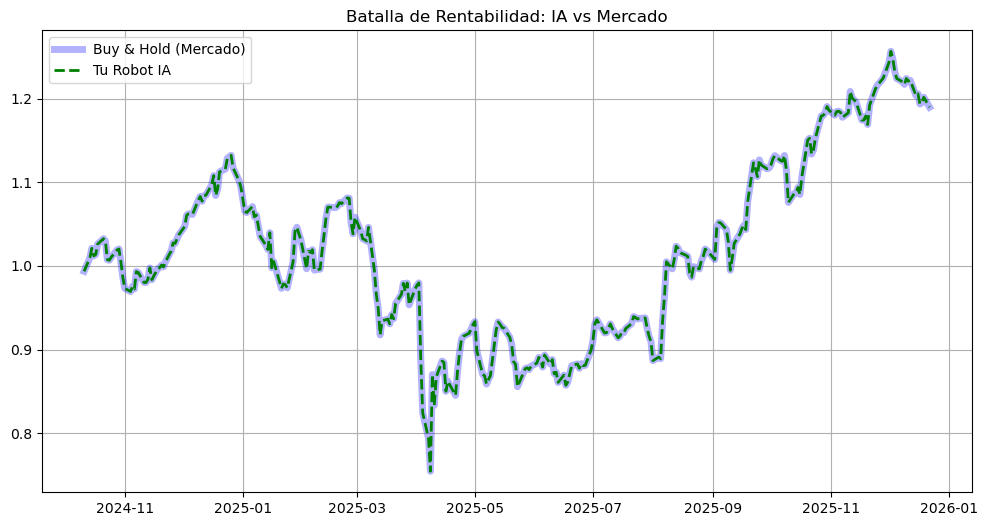

In [4]:
# Asumimos que ya tienes 'df', 'cerebro' (tu modelo) y las divisiones X_test, y_test del paso anterior.
# Si cerraste todo, tendrás que volver a correr el código anterior primero.

print("💰 Iniciando Simulación de Trading (Backtesting)...")

# 1. PREPARAR EL TABLERO DE JUEGO
# Tomamos solo la parte de "Prueba" (el pasado reciente que el modelo NO usó para entrenar)
df_simulacion = df.loc[X_test.index].copy()

# Generamos las predicciones para todo este periodo
df_simulacion['Prediccion'] = cerebro.predict(X_test)

# 2. CALCULAR GANANCIAS (Matemática Financiera)
# Estrategia "Buy & Hold" (Comprar y mantener): Es simplemente el retorno diario de Apple
df_simulacion['Retorno_BuyHold'] = df_simulacion['Retorno_Apple']

# Estrategia "Robot IA":
# Si el robot dijo 1 (Subir), compramos (ganamos el retorno de Apple).
# Si el robot dijo 0 (Bajar), nos quedamos en Cash (ganancia 0, evitamos pérdidas).
df_simulacion['Retorno_Robot'] = df_simulacion['Retorno_Apple'] * df_simulacion['Prediccion']

# 3. ACUMULAR LAS GANANCIAS (Interés Compuesto)
# Empezamos con $1 (base 1) y vemos cómo crece
df_simulacion['Acumulado_BuyHold'] = (1 + df_simulacion['Retorno_BuyHold']).cumprod()
df_simulacion['Acumulado_Robot'] = (1 + df_simulacion['Retorno_Robot']).cumprod()

# 4. RESULTADOS FINALES
inversion_inicial = 10000 # 10 mil dólares
final_buyhold = inversion_inicial * df_simulacion['Acumulado_BuyHold'].iloc[-1]
final_robot = inversion_inicial * df_simulacion['Acumulado_Robot'].iloc[-1]

print(f"---------------------------------------------")
print(f"💵 Inversión Inicial: ${inversion_inicial}")
print(f"📉 Estrategia Buy & Hold (Si no hacías nada): ${final_buyhold:.2f}")
print(f"🤖 Estrategia Robot IA (Siguiendo al modelo): ${final_robot:.2f}")
print(f"---------------------------------------------")

if final_robot > final_buyhold:
    print("🏆 ¡VICTORIA! Tu IA le ganó al mercado.")
else:
    print("🐢 El mercado ganó esta vez. (Es normal, Apple subió mucho).")

# 5. GRAFICAR LA CARRERA (VISUALIZACIÓN MEJORADA)
plt.figure(figsize=(12, 6))

# Buy & Hold: Línea Gorda y transparente
plt.plot(df_simulacion.index, df_simulacion['Acumulado_BuyHold'],
         label='Buy & Hold (Mercado)', color='blue', linewidth=5, alpha=0.3)

# Robot: Línea Fina y Punteada (para ver si se separa)
plt.plot(df_simulacion.index, df_simulacion['Acumulado_Robot'],
         label='Tu Robot IA', color='green', linewidth=2, linestyle='--')

plt.title('Batalla de Rentabilidad: IA vs Mercado')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("🧠 Actualizando cerebro del Robot a V2.0 (Con Análisis Técnico)...")

# 1. RECUPERAMOS LOS DATOS
df_v2 = df.copy()

# 2. CREAMOS NUEVOS "SENTIDOS" (Corregido: Usamos 'Apple' en vez de 'Close')
# SMA_10: Promedio de 10 días
df_v2['SMA_10'] = df_v2['Apple'].rolling(window=10).mean()
# SMA_50: Promedio de 50 días
df_v2['SMA_50'] = df_v2['Apple'].rolling(window=50).mean()

# La Pista Maestra: Cruce de medias
df_v2['Ratio_Tendencia'] = df_v2['SMA_10'] / df_v2['SMA_50']

# Volatilidad (Riesgo)
df_v2['Volatilidad'] = df_v2['Retorno_Apple'].rolling(window=10).std()

# Limpiamos los huecos vacíos (NaN) de los promedios
df_v2 = df_v2.dropna()

# 3. RE-DEFINIMOS EL EXAMEN
feature_cols = ['Ratio_Tendencia', 'Volatilidad', 'Mercado_Ayer']
X = df_v2[feature_cols]
y = df_v2['Target']

# Separamos (80% entrenar, 20% probar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 4. ENTRENAR NUEVO MODELO
cerebro_v2 = LogisticRegression()
cerebro_v2.fit(X_train, y_train)

# 5. EVALUAR MEJORA
predicciones_v2 = cerebro_v2.predict(X_test)
precision_v2 = accuracy_score(y_test, predicciones_v2)

print(f"📊 Precisión del Robot V2: {precision_v2:.2%}")

# Ver qué variable le importa más ahora
importancias = pd.DataFrame(data={
    'Variable': feature_cols,
    'Importancia': cerebro_v2.coef_[0]
})
print("\n🔍 ¿Qué está mirando el robot ahora?")
print(importancias.sort_values(by='Importancia', key=abs, ascending=False))

🧠 Actualizando cerebro del Robot a V2.0 (Con Análisis Técnico)...
📊 Precisión del Robot V2: 53.95%

🔍 ¿Qué está mirando el robot ahora?
          Variable  Importancia
2     Mercado_Ayer     0.118209
1      Volatilidad    -0.085498
0  Ratio_Tendencia     0.019316


💰 Iniciando Simulación V2 (Robot Táctico vs Mercado)...
💵 Inversión Inicial: $10000
📉 Mercado (Apple):   $11808.59
🤖 Tu Robot V2:       $11808.59
🐢 El mercado ganó por $0.00 (A veces 'menos es más' en riesgo)


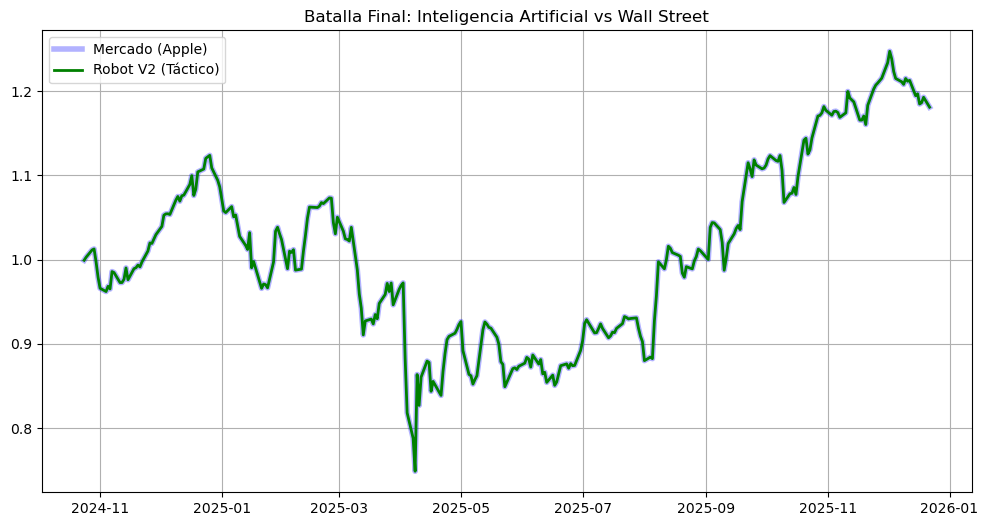

In [7]:
print("💰 Iniciando Simulación V2 (Robot Táctico vs Mercado)...")

# 1. PREPARAR DATOS DE PRUEBA
# Usamos df_v2 que ya tiene las columnas técnicas
df_simulacion = df_v2.loc[X_test.index].copy()

# 2. PREDICCIONES DEL ROBOT V2
df_simulacion['Prediccion'] = cerebro_v2.predict(X_test)

# 3. CÁLCULO DE GANANCIAS
# Estrategia Mercado (Apple Buy & Hold)
df_simulacion['Retorno_BuyHold'] = df_simulacion['Retorno_Apple']

# Estrategia Robot V2
df_simulacion['Retorno_Robot'] = df_simulacion['Retorno_Apple'] * df_simulacion['Prediccion']

# 4. ACUMULADO (Interés Compuesto)
df_simulacion['Acumulado_BuyHold'] = (1 + df_simulacion['Retorno_BuyHold']).cumprod()
df_simulacion['Acumulado_Robot'] = (1 + df_simulacion['Retorno_Robot']).cumprod()

# 5. RESULTADOS EN DÓLARES
inversion = 10000
final_mercado = inversion * df_simulacion['Acumulado_BuyHold'].iloc[-1]
final_robot = inversion * df_simulacion['Acumulado_Robot'].iloc[-1]

print(f"💵 Inversión Inicial: ${inversion}")
print(f"📉 Mercado (Apple):   ${final_mercado:.2f}")
print(f"🤖 Tu Robot V2:       ${final_robot:.2f}")

diferencia = final_robot - final_mercado
if diferencia > 0:
    print(f"🏆 ¡GANASTE! Tu robot superó al mercado por ${diferencia:.2f}")
else:
    print(f"🐢 El mercado ganó por ${abs(diferencia):.2f} (A veces 'menos es más' en riesgo)")

# 6. GRÁFICO FINAL
plt.figure(figsize=(12, 6))
plt.plot(df_simulacion.index, df_simulacion['Acumulado_BuyHold'], 
         label='Mercado (Apple)', color='blue', alpha=0.3, linewidth=4)
plt.plot(df_simulacion.index, df_simulacion['Acumulado_Robot'], 
         label='Robot V2 (Táctico)', color='green', linewidth=2)

plt.title('Batalla Final: Inteligencia Artificial vs Wall Street')
plt.legend()
plt.grid(True)
plt.show()

👮‍♂️ Activando Modo EXIGENTE (Umbral de confianza > 60%)...
---------------------------------------------
💵 Inversión: $10,000
📉 Mercado (Buy & Hold):   $11808.59
🤖 Robot (Modo Exigente):  $10000.00
---------------------------------------------
📊 El robot operó en 0 de 291 días (0.0% del tiempo).


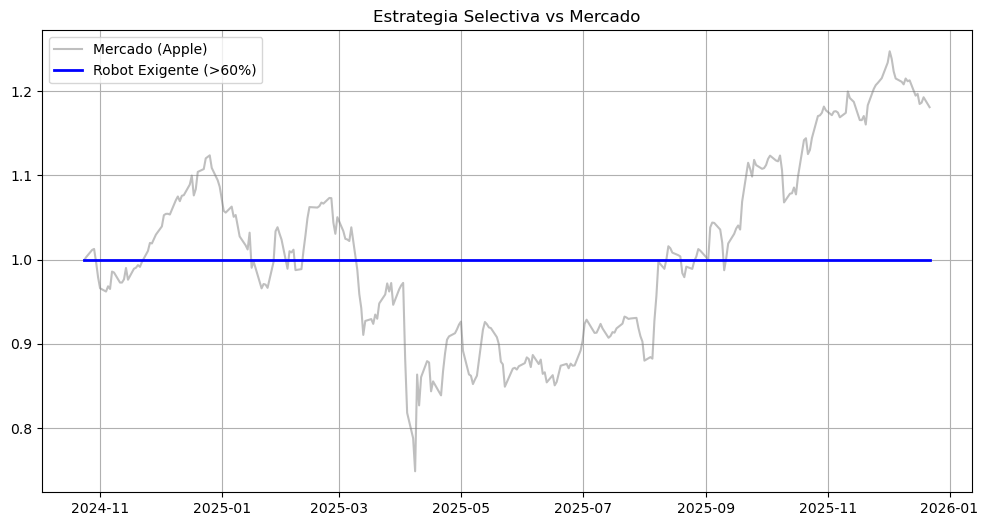

In [8]:
print("👮‍♂️ Activando Modo EXIGENTE (Umbral de confianza > 60%)...")

# 1. OBTENER LA PROBABILIDAD REAL (No solo SÍ/NO)
# La columna 1 es la probabilidad de que SUBA
probabilidades = cerebro_v2.predict_proba(X_test)[:, 1]

# 2. APLICAR EL FILTRO (Threshold)
# Si la confianza es mayor a 0.6 (60%), compramos (1). Si no, vendemos (0).
umbral = 0.60
df_simulacion['Prediccion_Exigente'] = np.where(probabilidades > umbral, 1, 0)

# 3. CALCULAR RESULTADOS CON EL NUEVO CRITERIO
df_simulacion['Retorno_Robot_Exigente'] = df_simulacion['Retorno_Apple'] * df_simulacion['Prediccion_Exigente']
df_simulacion['Acumulado_Robot_Exigente'] = (1 + df_simulacion['Retorno_Robot_Exigente']).cumprod()

# 4. RESULTADOS FINALES
final_exigente = inversion * df_simulacion['Acumulado_Robot_Exigente'].iloc[-1]

print(f"---------------------------------------------")
print(f"💵 Inversión: $10,000")
print(f"📉 Mercado (Buy & Hold):   ${final_mercado:.2f}")
print(f"🤖 Robot (Modo Exigente):  ${final_exigente:.2f}")
print(f"---------------------------------------------")

# ¿Cuántos días decidió operar?
dias_operados = df_simulacion['Prediccion_Exigente'].sum()
total_dias = len(df_simulacion)
print(f"📊 El robot operó en {dias_operados} de {total_dias} días ({dias_operados/total_dias:.1%} del tiempo).")

# 5. GRÁFICO FINAL
plt.figure(figsize=(12, 6))
plt.plot(df_simulacion.index, df_simulacion['Acumulado_BuyHold'], label='Mercado (Apple)', color='gray', alpha=0.5)
plt.plot(df_simulacion.index, df_simulacion['Acumulado_Robot_Exigente'], label='Robot Exigente (>60%)', color='blue', linewidth=2)

plt.title('Estrategia Selectiva vs Mercado')
plt.legend()
plt.grid(True)
plt.show()

🔬 Analizando la Confianza del Robot...
Mínima confianza detectada: 52.91%
Máxima confianza detectada: 53.30%
Promedio de confianza:      53.19%


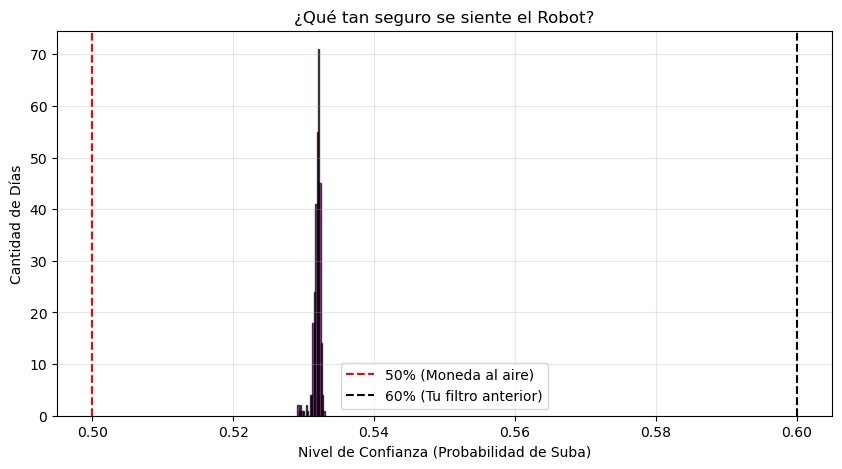

In [9]:
print("🔬 Analizando la Confianza del Robot...")

# Recuperamos las probabilidades (Qué tan seguro estaba cada día)
# (Recordatorio: La columna 1 es la probabilidad de que SUBA)
probabilidades = cerebro_v2.predict_proba(X_test)[:, 1]

# Estadísticas básicas
print(f"Mínima confianza detectada: {probabilidades.min():.2%}")
print(f"Máxima confianza detectada: {probabilidades.max():.2%}")
print(f"Promedio de confianza:      {probabilidades.mean():.2%}")

# GRAFICAR EL HISTOGRAMA
plt.figure(figsize=(10, 5))
plt.hist(probabilidades, bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(x=0.5, color='red', linestyle='--', label='50% (Moneda al aire)')
plt.axvline(x=0.6, color='black', linestyle='--', label='60% (Tu filtro anterior)')

plt.title('¿Qué tan seguro se siente el Robot?')
plt.xlabel('Nivel de Confianza (Probabilidad de Suba)')
plt.ylabel('Cantidad de Días')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

⚡️ Re-calibrando Robot con Umbral Dinámico (Promedio)...
⚙️ Nuevo filtro configurado en: 53.1893%
---------------------------------------------
💵 Inversión Inicial: $10,000
📉 Mercado (Buy & Hold):    $11808.59
🤖 Robot (Calibrado):       $9876.90
---------------------------------------------
🐢 El mercado ganó. (Pero mira si tu línea es más estable/segura)


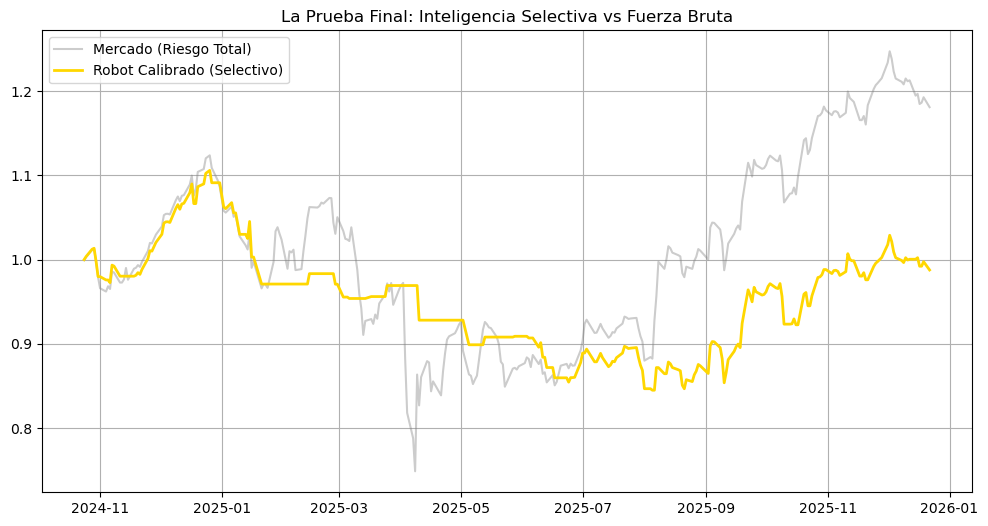

In [10]:
print("⚡️ Re-calibrando Robot con Umbral Dinámico (Promedio)...")

# 1. DEFINIR EL NUEVO UMBRAL (La media exacta)
# Solo operamos si la confianza es SUPERIOR a lo normal
umbral_dinamico = probabilidades.mean() 

print(f"⚙️ Nuevo filtro configurado en: {umbral_dinamico:.4%}")

# 2. APLICAR EL FILTRO
# Si confianza > promedio -> Comprar (1)
# Si confianza < promedio -> Esperar en efectivo (0)
df_simulacion['Prediccion_Calibrada'] = np.where(probabilidades > umbral_dinamico, 1, 0)

# 3. CALCULAR RESULTADOS
df_simulacion['Retorno_Robot_Calibrado'] = df_simulacion['Retorno_Apple'] * df_simulacion['Prediccion_Calibrada']
df_simulacion['Acumulado_Robot_Calibrado'] = (1 + df_simulacion['Retorno_Robot_Calibrado']).cumprod()

# 4. RESULTADOS FINALES EN DÓLARES
final_calibrado = inversion * df_simulacion['Acumulado_Robot_Calibrado'].iloc[-1]
final_mercado = inversion * df_simulacion['Acumulado_BuyHold'].iloc[-1]

print(f"---------------------------------------------")
print(f"💵 Inversión Inicial: $10,000")
print(f"📉 Mercado (Buy & Hold):    ${final_mercado:.2f}")
print(f"🤖 Robot (Calibrado):       ${final_calibrado:.2f}")
print(f"---------------------------------------------")

# Diferencia
diferencia = final_calibrado - final_mercado
if diferencia > 0:
    print(f"🏆 ¡HAS GANADO! Tu estrategia superó al mercado por ${diferencia:.2f}")
else:
    print(f"🐢 El mercado ganó. (Pero mira si tu línea es más estable/segura)")

# 5. GRÁFICO FINAL DEFINITIVO
plt.figure(figsize=(12, 6))
plt.plot(df_simulacion.index, df_simulacion['Acumulado_BuyHold'], label='Mercado (Riesgo Total)', color='gray', alpha=0.4)
plt.plot(df_simulacion.index, df_simulacion['Acumulado_Robot_Calibrado'], label='Robot Calibrado (Selectivo)', color='gold', linewidth=2)

plt.title('La Prueba Final: Inteligencia Selectiva vs Fuerza Bruta')
plt.legend()
plt.grid(True)
plt.show()